In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataframe
df=pd.read_csv("SMS Spam Filter.csv")
#renaming the column names
df.columns=["Label","Text"]

In [3]:
#displaying the 1st 5 rows of dataset
df.head()

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
#displaying dimensions of dataset in tuple format
df.shape

(5568, 2)

In [5]:
#displaying all the column names of the dataset
df.columns

Index(['Label', 'Text'], dtype='object')

In [6]:
#displaying all unqiue values of target column
df["Label"].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
#displaying count of each value of label
print("Number of Ham Cases are:")
print(len(df[df["Label"]=="ham"]))
print("Number of Spam Cases are:")
print(len(df[df["Label"]=="spam"]))

Number of Ham Cases are:
4822
Number of Spam Cases are:
746


<AxesSubplot:xlabel='Label', ylabel='count'>

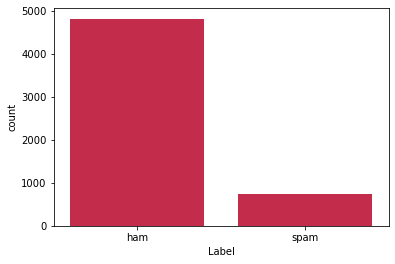

In [8]:
#representing the counts in the count plot
sns.countplot(x=df["Label"],color="crimson")

In [9]:
#checking if there is any missing value in the dataset
df.isna().sum()

Label    0
Text     0
dtype: int64

### Cleaning/Preprocessing our dataset includes the follwoing
#### 1) Remove Punctuation
#### 2) Tokenization
#### 3) Remove Stopwords
#### 4) Stemming / Lemmatization
#### 5) Count Vectorization

In [4]:
import string 
import re
import nltk

#### Remove Punctuation

In [5]:
#displaying all types of punctuation stored
#since punctuations do not convey any meaning or sentiments so we can remove them
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#function created to remove punctuation
def remove_punc(txt):
    lst1="".join([i for i in txt if i not in string.punctuation])
    return lst1

df["Without Punctuation"]=df["Text"].apply(lambda x:remove_punc(x))
df.head()

,Label,Text,Without Punctuation
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


#### Tokenization

In [7]:
#function to do tokenization
def tokenize(txt):
    lst2=re.split('\W+',txt)
    return lst2

df["After Tokenization"]=df["Without Punctuation"].apply(lambda x:tokenize(x.lower()))
df.head()

,Label,Text,Without Punctuation,After Tokenization
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### Removing Stopwords

In [8]:
#storing all the stopwords in english language
sw=nltk.corpus.stopwords.words("english")

#since we took x.lower() in last case so we need not to consider any upper case alphabets
#slicing 1st 10 contents of the list
sw[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
#function to remove stop words
def remove_sw(lst2):
    lst3=[i for i in lst2 if i not in sw]
    return lst3

df["After Removing Stop Words"]=df["After Tokenization"].apply(lambda x:remove_sw(x))
df.head()

,Label,Text,Without Punctuation,After Tokenization,After Removing Stop Words
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### Stemming

In [10]:
#stemming removes the prefix or suffix part of any word to find the root word from the word
ps=nltk.PorterStemmer()

In [11]:
#all the following have same root word which is "grow"
print(ps.stem("grows"))
print(ps.stem("growing"))
print(ps.stem("grow"))

grow
grow
grow


In [12]:
#all the following have same root word which is "run"
print(ps.stem("runs"))
print(ps.stem("running"))
print(ps.stem("run"))

run
run
run


In [13]:
#function to do stemming
def stemming(lst3):
    lst4=[ps.stem(i) for i in lst3]
    return lst4

df["After Stemming"]=df["After Removing Stop Words"].apply(lambda x:stemming(x))
df.head()

,Label,Text,Without Punctuation,After Tokenization,After Removing Stop Words,After Stemming
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


#### Lemmatization

In [14]:
#under stemming we get some errorful words and to fix them we use lemmatization
wn=nltk.WordNetLemmatizer()

In [15]:
#though "meanness" and "meaning" have different definition still stem gives same root word as result
print(ps.stem("meanness"))
print(ps.stem("meaning"))

mean
mean


In [16]:
#as "meanness" and "meaning" have different definition so lemmatize gives different root words as results
print(wn.lemmatize("meanness"))
print(wn.lemmatize("meaning"))

meanness
meaning


In [17]:
#though "geese" and "goose" have similar definition still stem gives different root words as result
print(ps.stem("geese"))
print(ps.stem("goose"))

gees
goos


In [18]:
#as "geese" and "goose" have similar definition so lemmatize gives same root word as result
print(wn.lemmatize("geese"))
print(wn.lemmatize("goose"))

goose
goose


In [19]:
#function to do lemmatization
def lemmatizing(lst3):
    lst4=[wn.lemmatize(i) for i in lst3]
    return lst4

df["After Lemmatize"]=df["After Removing Stop Words"].apply(lambda x:lemmatizing(x))
df.head()

,Label,Text,Without Punctuation,After Tokenization,After Removing Stop Words,After Stemming,After Lemmatize
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


#### Removing Punctuation, Tokenization, Removing Stopwords, Stemming

In [30]:
def clean_text(txt):
    lst1="".join([i for i in txt if i not in string.punctuation])
    lst2=re.split('\W+',txt)
    lst3=[i for i in lst2 if i not in sw]
    lst4=[ps.stem(i) for i in lst3]
    return lst4

df_new=pd.read_csv("SMS Spam Filter.tsv",sep="\t",header=None)
df_new.columns=["Label","Text"]
df_new["After Cleaning"]=df["Text"].apply(lambda x:clean_text(x))
df_new.head()

,Label,Text,After Cleaning
0,ham,I've been searching for the right words to tha...,"[I, search, right, word, thank, breather, I, p..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, FA, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, I, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, they, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, have, A, date, ON, sunday, with, will, ]"


#### Count Vectorization

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
#there are many parameters but analyzer is used as we need each row to be passed to the cv object
#analyzer takes a function value and passes each row to that function
cv=CountVectorizer(analyzer=clean_text)
x=cv.fit_transform(df["Text"])

#number of rows->number of rows of the dataset
#y->number of distinct words extracted from all over dataset
x.shape

(5568, 7531)

In [38]:
#now we will store the elements of features inside a variable x
x=x.toarray()
x=pd.DataFrame(x)
#the dataset consists of fully numbers,since our ML model can not work with text data
x.head()

,0,1,2,3,4,5,6,7,8,9,...,7521,7522,7523,7524,7525,7526,7527,7528,7529,7530
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#now we will store the value of label inside a variable y
y=df["Label"]
y.head()

0     ham
1    spam
2     ham
3     ham
4     ham
Name: Label, dtype: object

In [59]:
#since this is categorical data so we need to convert it to numerical form
from sklearn.preprocessing import LabelEncoder
#Label Encoding means converting the whole categorical vale column to numerical form
lb=LabelEncoder()
y=lb.fit_transform(y)
y=pd.DataFrame(y)
y.columns=["Label"]
y.head()

,Label
0,0
1,1
2,0
3,0
4,0


In [60]:
#performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression
model_lor=LogisticRegression()
model_lor.fit(x_train,y_train)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [67]:
y_preds_lor=model_lor.predict(x_test)
y_preds_lor

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
from sklearn.metrics import confusion_matrix
cm_lor=confusion_matrix(y_test,y_preds_lor)
cm_lor

array([[954,   1],
       [ 14, 145]], dtype=int64)

<AxesSubplot:>

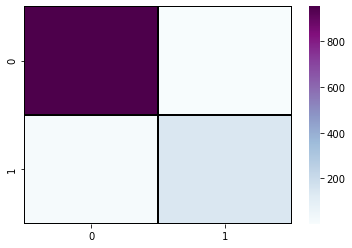

In [74]:
import seaborn as sns
sns.heatmap(cm_lor,linewidth=1,linecolor="black",cmap="BuPu")

In [75]:
from sklearn.metrics import accuracy_score
acc_lor=accuracy_score(y_test,y_preds_lor)
acc_lor

0.9865350089766607